In [1]:
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt


predictions_df = pd.read_csv("predictions.csv")
predictions_df

img_path    pred_x    pred_y    true_x    true_y  \
0     Dataset/1757528230345.jpg  0.422382  0.799085  0.132168  0.160768   
1     Dataset/1757528230599.jpg  0.452861  0.727934  0.169959  0.110881   
2     Dataset/1755881778839.jpg  0.548475  0.282585  0.689418  0.921319   
3     Dataset/1755731932279.jpg  0.387981  0.752368  0.338587  0.103723   
4     Dataset/1755881779099.jpg  0.651977  0.330772  0.722845  0.973483   
...                         ...       ...       ...       ...       ...   
5462  Dataset/1757528194242.jpg  0.620825  0.452052  0.623450  0.450113   
5463  Dataset/1755730187126.jpg  0.133691  0.678522  0.131181  0.676465   
5464  Dataset/1757521144606.jpg  0.273616  0.070258  0.272848  0.072964   
5465  Dataset/1755777777211.jpg  0.141680  0.543671  0.142512  0.541963   
5466  Dataset/1755777765742.jpg  0.646508  0.731744  0.645564  0.733128   

      distance  
0     0.701194  
1     0.678814  
2     0.654100  
3     0.650523  
4     0.646606  
...        ...  
5462  0.003264  
5463  0.003246  
5464  0.002813  
5465  0.001900  
5466  0.001675  

[5467 rows x 6 columns]

In [2]:
def display_image_with_preds(idx):
    row = predictions_df.iloc[idx]
    img_path = row['img_path']
    pred_x, pred_y = row['pred_x'], row['pred_y']
    true_x, true_y = row['true_x'], row['true_y']

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show image on the left
    img = plt.imread(img_path)
    axs[0].imshow(img)
    axs[0].set_title(f"Image: {img_path.split('/')[-1]}")
    axs[0].axis('off')

    # Show prediction and ground truth on the right
    axs[1].plot(1 - pred_x, 1 - pred_y, 'ro', label='Prediction', markersize=10)
    axs[1].plot(1 - true_x, 1 - true_y, 'go', label='Ground Truth', markersize=10)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)
    axs[1].set_aspect('equal', adjustable='box')
    axs[1].set_xticks([0, 1])
    axs[1].set_yticks([0, 1])
    axs[1].set_title(f"Pred (red): ({pred_x:.2f}, {pred_y:.2f})\nTrue (green): ({true_x:.2f}, {true_y:.2f})")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    return img_path

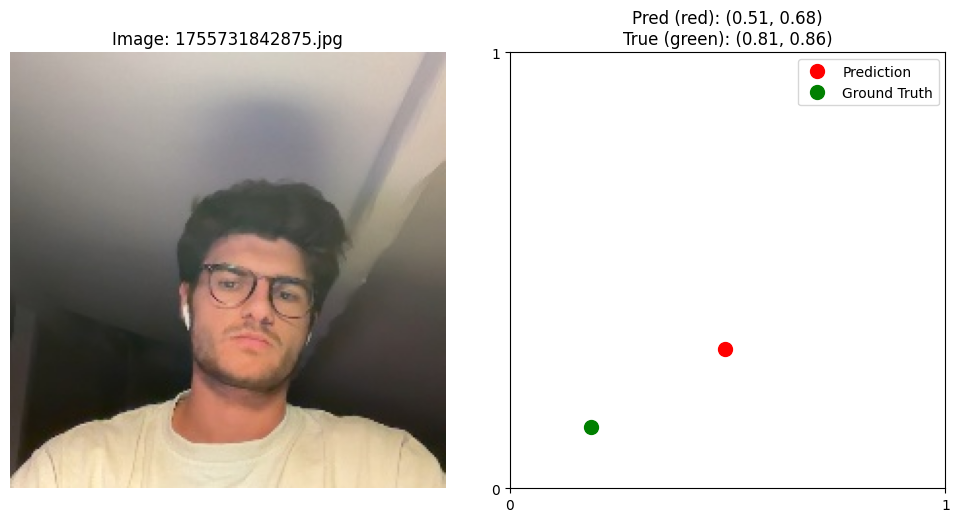

In [3]:
images_to_delete = []

idx = 0
while True:
    img_path = display_image_with_preds(idx)

    choice = input("d (delete) / s (skip) / q (quit)")
    if choice == "d":
        images_to_delete.append(img_path)
    elif choice == "q":
        break

    idx += 1
    
    # Nettoyer l'affichage précédent
    clear_output(wait=True)

In [4]:
print('images_to_delete', images_to_delete)

images_to_delete ['Dataset/1757528230345.jpg', 'Dataset/1757528230599.jpg', 'Dataset/1755731932279.jpg', 'Dataset/1757528164255.jpg', 'Dataset/1757528181695.jpg', 'Dataset/1755730137226.jpg', 'Dataset/1757521093573.jpg', 'Dataset/1757521093311.jpg', 'Dataset/1755731843650.jpg', 'Dataset/1757583614440.jpg', 'Dataset/1755731238661.jpg', 'Dataset/1755730498529.jpg', 'Dataset/1755898104798.jpg', 'Dataset/1755731890266.jpg', 'Dataset/1755730135433.jpg', 'Dataset/1755730543087.jpg', 'Dataset/1755730529024.jpg', 'Dataset/1755730136459.jpg', 'Dataset/1757528172214.jpg', 'Dataset/1755881803188.jpg', 'Dataset/1755731338507.jpg', 'Dataset/1755731241226.jpg', 'Dataset/1755881771921.jpg', 'Dataset/1755898107607.jpg', 'Dataset/1755730525196.jpg', 'Dataset/1755730491359.jpg', 'Dataset/1757518941740.jpg', 'Dataset/1757583672418.jpg', 'Dataset/1755777755476.jpg', 'Dataset/1755730563024.jpg', 'Dataset/1757583656338.jpg', 'Dataset/1755731871295.jpg', 'Dataset/1755730157432.jpg', 'Dataset/1755730210439.jp

In [5]:
dataset_df = pd.read_csv('dataset.csv')
print('Length of dataset_df', len(dataset_df))

dataset_df[dataset_df['img_filename'].isin(images_to_delete)]
filtered_dataset_df = dataset_df[~dataset_df['img_filename'].isin(images_to_delete)]

filtered_dataset_df.to_csv('dataset_fixed.csv', index=False)
print('Length of filtered_dataset_df', len(filtered_dataset_df))


Length of dataset_df 5467
Length of filtered_dataset_df 5422
